<a href="https://colab.research.google.com/github/sandarnaing/tutorial/blob/main/tutorial_1_dataprofessor/part_5_acetylcholinesterase_compare_regressor_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [3]:
df = pd.read_csv('06_acetylcholinesterase_bioactivity_data_3classes_pubchem_fp_pIC50.csv')
#df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.68
6118,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.56
6119,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.12
6120,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.26


In [5]:
X = df.drop('pIC50', axis = 1)
Y = df.pIC50

In [6]:
X.shape

(6122, 881)

In [7]:
Y.shape

(6122,)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold = (.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(6122, 142)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
clf = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 74%|███████▍  | 31/42 [00:38<00:09,  1.15it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [00:49<00:00,  1.16it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 4897, number of used features: 142
[LightGBM] [Info] Start training from score 5.813320


100%|██████████| 42/42 [00:49<00:00,  1.18s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 74%|███████▍  | 31/42 [00:31<00:08,  1.35it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [00:40<00:00,  1.20it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 4897, number of used features: 142
[LightGBM] [Info] Start training from score 5.813320


100%|██████████| 42/42 [00:41<00:00,  1.02it/s]


In [18]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.88,0.89,0.53,0.16
ExtraTreeRegressor,0.88,0.89,0.53,0.11
ExtraTreesRegressor,0.88,0.89,0.53,6.23
GaussianProcessRegressor,0.88,0.89,0.53,8.21
RandomForestRegressor,0.84,0.85,0.61,4.57
XGBRegressor,0.83,0.84,0.63,0.30
BaggingRegressor,0.83,0.83,0.64,0.47
MLPRegressor,0.81,0.81,0.68,6.01
HistGradientBoostingRegressor,0.67,0.68,0.89,1.03


In [ ]:
predictions_train.to_csv('predictions_train_r2.csv')

In [19]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.46,0.52,1.10,1.40
RandomForestRegressor,0.45,0.52,1.10,4.20
HistGradientBoostingRegressor,0.45,0.52,1.11,1.41
LGBMRegressor,0.44,0.50,1.12,0.28
BaggingRegressor,0.42,0.49,1.13,0.45
KNeighborsRegressor,0.42,0.49,1.14,0.13
SVR,0.40,0.47,1.16,2.09
NuSVR,0.39,0.46,1.16,1.62
MLPRegressor,0.38,0.46,1.17,6.05


In [20]:
predictions_test.to_csv('predictions_test_r2.csv')

[(0.0, 1.0)]

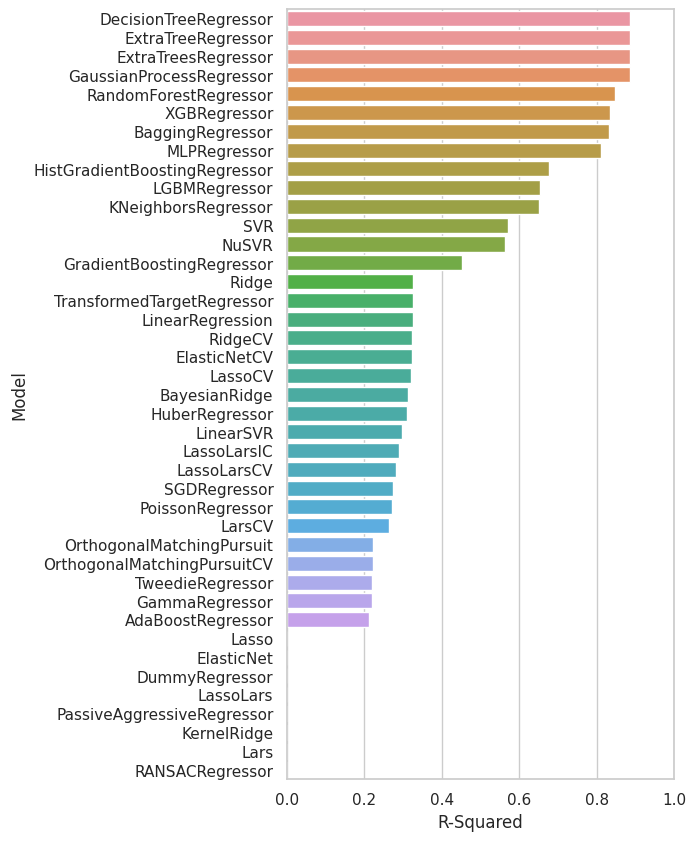

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

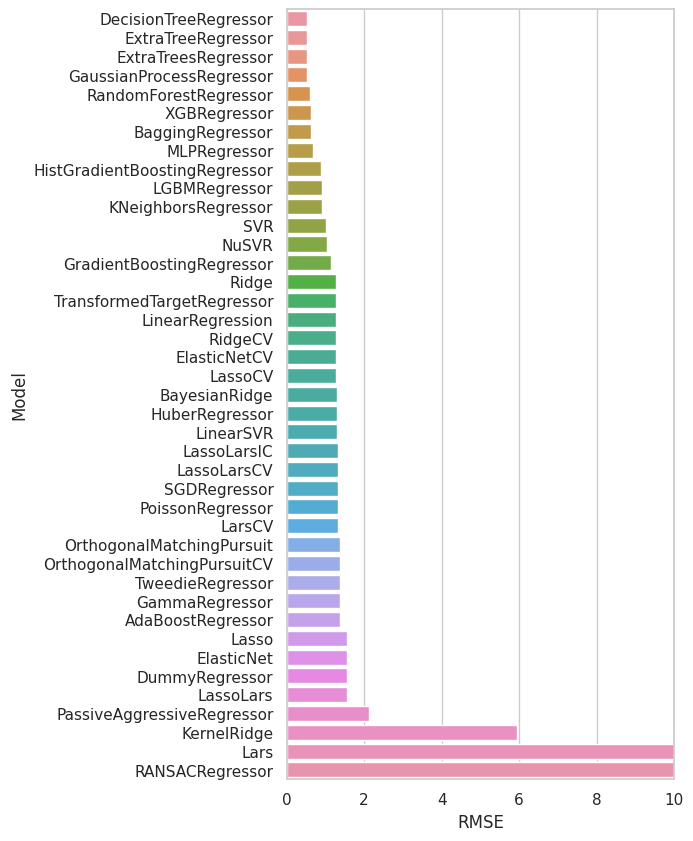

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

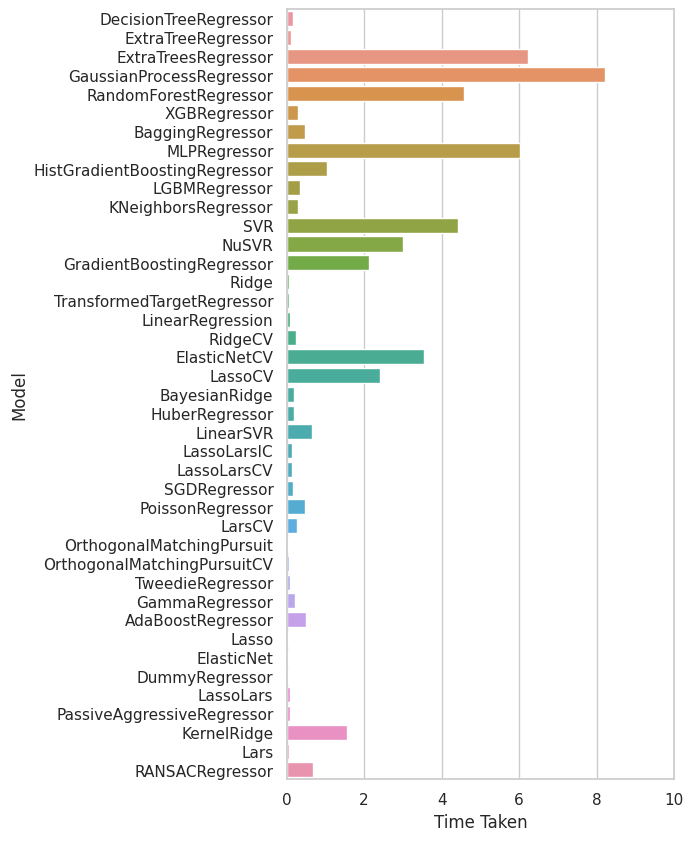

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))